# Problema 2 - Fruits and Vegetables Recognizer


In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Configurar para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

TensorFlow version: 2.12.0
Keras version: 2.12.0


In [2]:
# Configuración de rutas del dataset
data_path = 'P2-img_fruits-vegetables'
fruits_path = os.path.join(data_path, 'Fruits')
vegetables_path = os.path.join(data_path, 'Vegetables')

# Explorar la estructura del dataset
print("=== EXPLORACIÓN DEL DATASET ===")
print(f"Ruta principal: {data_path}")
print(f"Ruta de frutas: {fruits_path}")
print(f"Ruta de verduras: {vegetables_path}")

# Listar clases de frutas
fruit_classes = sorted(os.listdir(fruits_path))
print(f"\nClases de frutas ({len(fruit_classes)}):")
for i, fruit in enumerate(fruit_classes, 1):
    fruit_dir = os.path.join(fruits_path, fruit)
    if os.path.isdir(fruit_dir):
        num_images = len([f for f in os.listdir(fruit_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"{i:2d}. {fruit}: {num_images} imágenes")

# Listar clases de verduras
vegetable_classes = sorted(os.listdir(vegetables_path))
print(f"\nClases de verduras ({len(vegetable_classes)}):")
for i, vegetable in enumerate(vegetable_classes, 1):
    vegetable_dir = os.path.join(vegetables_path, vegetable)
    if os.path.isdir(vegetable_dir):
        num_images = len([f for f in os.listdir(vegetable_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"{i:2d}. {vegetable}: {num_images} imágenes")

# Seleccionar 3 frutas y 3 verduras para el proyecto
selected_fruits = ['FreshApple', 'FreshBanana', 'FreshOrange']
selected_vegetables = ['FreshCarrot', 'FreshTomato', 'FreshPotato']

print(f"\n=== CLASES SELECCIONADAS PARA EL PROYECTO ===")
print(f"Frutas seleccionadas: {selected_fruits}")
print(f"Verduras seleccionadas: {selected_vegetables}")
print(f"Total de clases: {len(selected_fruits + selected_vegetables)}")

=== EXPLORACIÓN DEL DATASET ===
Ruta principal: P2-img_fruits-vegetables
Ruta de frutas: P2-img_fruits-vegetables/Fruits
Ruta de verduras: P2-img_fruits-vegetables/Vegetables

Clases de frutas (10):
 1. FreshApple: 612 imágenes
 2. FreshBanana: 623 imágenes
 3. FreshMango: 605 imágenes
 4. FreshOrange: 609 imágenes
 5. FreshStrawberry: 603 imágenes
 6. RottenApple: 583 imágenes
 7. RottenBanana: 573 imágenes
 8. RottenMango: 593 imágenes
 9. RottenOrange: 591 imágenes
10. RottenStrawberry: 596 imágenes

Clases de verduras (10):
 1. FreshBellpepper: 611 imágenes
 2. FreshCarrot: 619 imágenes
 3. FreshCucumber: 608 imágenes
 4. FreshPotato: 614 imágenes
 5. FreshTomato: 604 imágenes
 6. RottenBellpepper: 591 imágenes
 7. RottenCarrot: 579 imágenes
 8. RottenCucumber: 593 imágenes
 9. RottenPotato: 584 imágenes
10. RottenTomato: 595 imágenes

=== CLASES SELECCIONADAS PARA EL PROYECTO ===
Frutas seleccionadas: ['FreshApple', 'FreshBanana', 'FreshOrange']
Verduras seleccionadas: ['FreshCarr

In [3]:
# Crear estructura de directorios organizada para el proyecto
import shutil

# Crear directorio principal para datos organizados
organized_data_path = 'organized_data'
if os.path.exists(organized_data_path):
    shutil.rmtree(organized_data_path)

os.makedirs(organized_data_path, exist_ok=True)

# Función para copiar imágenes seleccionadas
def copy_selected_images(source_path, dest_path, selected_classes, category):
    for class_name in selected_classes:
        source_class_path = os.path.join(source_path, class_name)
        dest_class_path = os.path.join(dest_path, f"{category}_{class_name}")
        
        if os.path.exists(source_class_path):
            os.makedirs(dest_class_path, exist_ok=True)
            
            # Copiar imágenes
            images = [f for f in os.listdir(source_class_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            for image in images:
                source_image = os.path.join(source_class_path, image)
                dest_image = os.path.join(dest_class_path, image)
                shutil.copy2(source_image, dest_image)
            
            print(f"Copiadas {len(images)} imágenes de {class_name} a {dest_class_path}")

# Copiar frutas seleccionadas
print("Copiando frutas seleccionadas...")
copy_selected_images(fruits_path, organized_data_path, selected_fruits, "fruit")

# Copiar verduras seleccionadas
print("\nCopiando verduras seleccionadas...")
copy_selected_images(vegetables_path, organized_data_path, selected_vegetables, "vegetable")

# Verificar estructura creada
print(f"\n=== ESTRUCTURA DE DATOS ORGANIZADA ===")
for item in sorted(os.listdir(organized_data_path)):
    item_path = os.path.join(organized_data_path, item)
    if os.path.isdir(item_path):
        num_images = len([f for f in os.listdir(item_path) 
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"{item}: {num_images} imágenes")

Copiando frutas seleccionadas...
Copiadas 612 imágenes de FreshApple a organized_data/fruit_FreshApple
Copiadas 623 imágenes de FreshBanana a organized_data/fruit_FreshBanana
Copiadas 609 imágenes de FreshOrange a organized_data/fruit_FreshOrange

Copiando verduras seleccionadas...
Copiadas 619 imágenes de FreshCarrot a organized_data/vegetable_FreshCarrot
Copiadas 604 imágenes de FreshTomato a organized_data/vegetable_FreshTomato
Copiadas 614 imágenes de FreshPotato a organized_data/vegetable_FreshPotato

=== ESTRUCTURA DE DATOS ORGANIZADA ===
fruit_FreshApple: 612 imágenes
fruit_FreshBanana: 623 imágenes
fruit_FreshOrange: 609 imágenes
vegetable_FreshCarrot: 619 imágenes
vegetable_FreshPotato: 614 imágenes
vegetable_FreshTomato: 604 imágenes


=== VISUALIZACIÓN DE MUESTRAS DEL DATASET ===


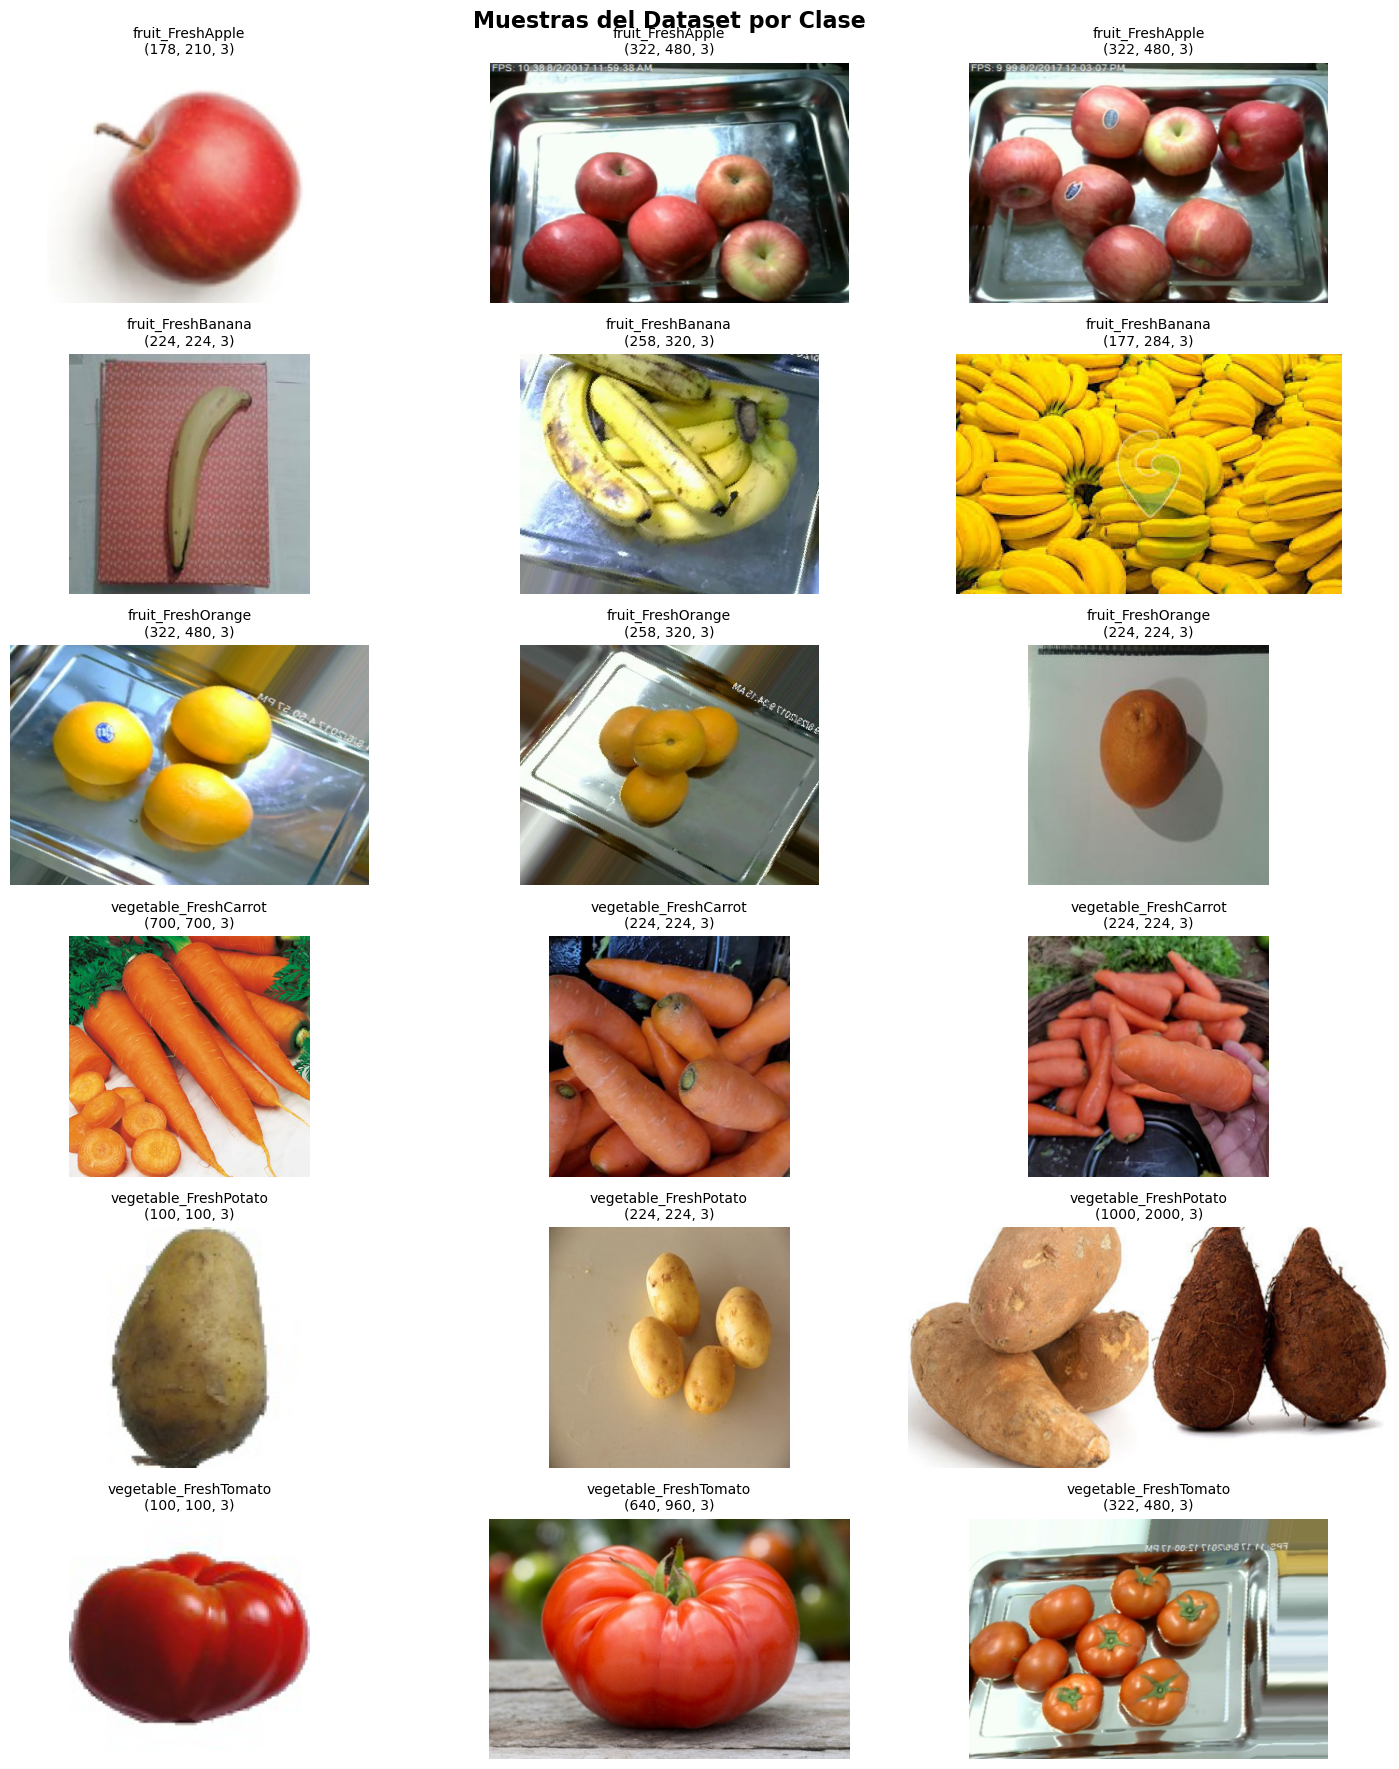

In [4]:
# Función para visualizar muestras del dataset
def plot_sample_images(data_path, num_samples=2):
    """Visualizar muestras de cada clase"""
    classes = sorted(os.listdir(data_path))
    
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 3*len(classes)))
    fig.suptitle('Muestras del Dataset por Clase', fontsize=16, fontweight='bold')
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            for j in range(min(num_samples, len(images))):
                img_path = os.path.join(class_path, images[j])
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                if len(classes) == 1:
                    ax = axes[j]
                else:
                    ax = axes[i, j]
                
                ax.imshow(img)
                ax.set_title(f'{class_name}\n{img.shape}', fontsize=10)
                ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualizar muestras
print("=== VISUALIZACIÓN DE MUESTRAS DEL DATASET ===")
plot_sample_images(organized_data_path, num_samples=3)

## Parte #1: Dataset y Preprocesamiento

### Configuración de Parámetros del Modelo

In [5]:
# Configuración de parámetros para el modelo
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3  # Usando imágenes a color (RGB)
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = len(selected_fruits + selected_vegetables)

print("=== CONFIGURACIÓN DEL MODELO ===")
print(f"Dimensiones de imagen: {IMG_HEIGHT}x{IMG_WIDTH}x{IMG_CHANNELS}")
print(f"Tamaño de batch: {BATCH_SIZE}")
print(f"Número de épocas: {EPOCHS}")
print(f"Número de clases: {NUM_CLASSES}")
print(f"Formato de color: RGB (a color)")

# Obtener lista de clases
class_names = sorted(os.listdir(organized_data_path))
print(f"\nClases del modelo:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

=== CONFIGURACIÓN DEL MODELO ===
Dimensiones de imagen: 224x224x3
Tamaño de batch: 32
Número de épocas: 50
Número de clases: 6
Formato de color: RGB (a color)

Clases del modelo:
0: fruit_FreshApple
1: fruit_FreshBanana
2: fruit_FreshOrange
3: vegetable_FreshCarrot
4: vegetable_FreshPotato
5: vegetable_FreshTomato


In [6]:
# Data Augmentation y Preprocesamiento
print("=== CONFIGURACIÓN DE DATA AUGMENTATION ===")

# Generador para entrenamiento con Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,                    # Normalización a valores entre 0 y 1
    rotation_range=40,                 # Rotación aleatoria hasta 40 grados
    width_shift_range=0.2,             # Desplazamiento horizontal
    height_shift_range=0.2,            # Desplazamiento vertical
    shear_range=0.2,                   # Transformación de corte
    zoom_range=0.2,                    # Zoom aleatorio
    horizontal_flip=True,              # Volteo horizontal
    brightness_range=[0.8, 1.2],      # Variación de brillo
    fill_mode='nearest',               # Relleno de píxeles
    validation_split=0.2               # 20% para validación
)

# Generador para validación (solo normalización)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generador para prueba (solo normalización)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Configuraciones de Data Augmentation aplicadas:")
print("- Normalización: valores entre 0 y 1")
print("- Rotación: hasta 40 grados")
print("- Desplazamientos: 20% horizontal y vertical")
print("- Transformación de corte: 20%")
print("- Zoom: 20%")
print("- Volteo horizontal: Sí")
print("- Variación de brillo: 80% a 120%")
print("- División: 80% entrenamiento, 20% validación")

=== CONFIGURACIÓN DE DATA AUGMENTATION ===
Configuraciones de Data Augmentation aplicadas:
- Normalización: valores entre 0 y 1
- Rotación: hasta 40 grados
- Desplazamientos: 20% horizontal y vertical
- Transformación de corte: 20%
- Zoom: 20%
- Volteo horizontal: Sí
- Variación de brillo: 80% a 120%
- División: 80% entrenamiento, 20% validación


In [7]:
# Crear generadores de datos usando flow_from_directory
print("=== CREANDO GENERADORES DE DATOS ===")

# Generador de entrenamiento
train_generator = train_datagen.flow_from_directory(
    organized_data_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Generador de validación
validation_generator = validation_datagen.flow_from_directory(
    organized_data_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

print(f"\nDatos de entrenamiento: {train_generator.samples} imágenes")
print(f"Datos de validación: {validation_generator.samples} imágenes")
print(f"Clases encontradas: {len(train_generator.class_indices)}")
print(f"Clases: {list(train_generator.class_indices.keys())}")

# Calcular steps por época
STEPS_PER_EPOCH = train_generator.samples // BATCH_SIZE
VALIDATION_STEPS = validation_generator.samples // BATCH_SIZE

print(f"\nSteps por época: {STEPS_PER_EPOCH}")
print(f"Steps de validación: {VALIDATION_STEPS}")

=== CREANDO GENERADORES DE DATOS ===
Found 2949 images belonging to 6 classes.
Found 732 images belonging to 6 classes.

Datos de entrenamiento: 2949 imágenes
Datos de validación: 732 imágenes
Clases encontradas: 6
Clases: ['fruit_FreshApple', 'fruit_FreshBanana', 'fruit_FreshOrange', 'vegetable_FreshCarrot', 'vegetable_FreshPotato', 'vegetable_FreshTomato']

Steps por época: 92
Steps de validación: 22


=== VISUALIZACIÓN DE DATA AUGMENTATION ===


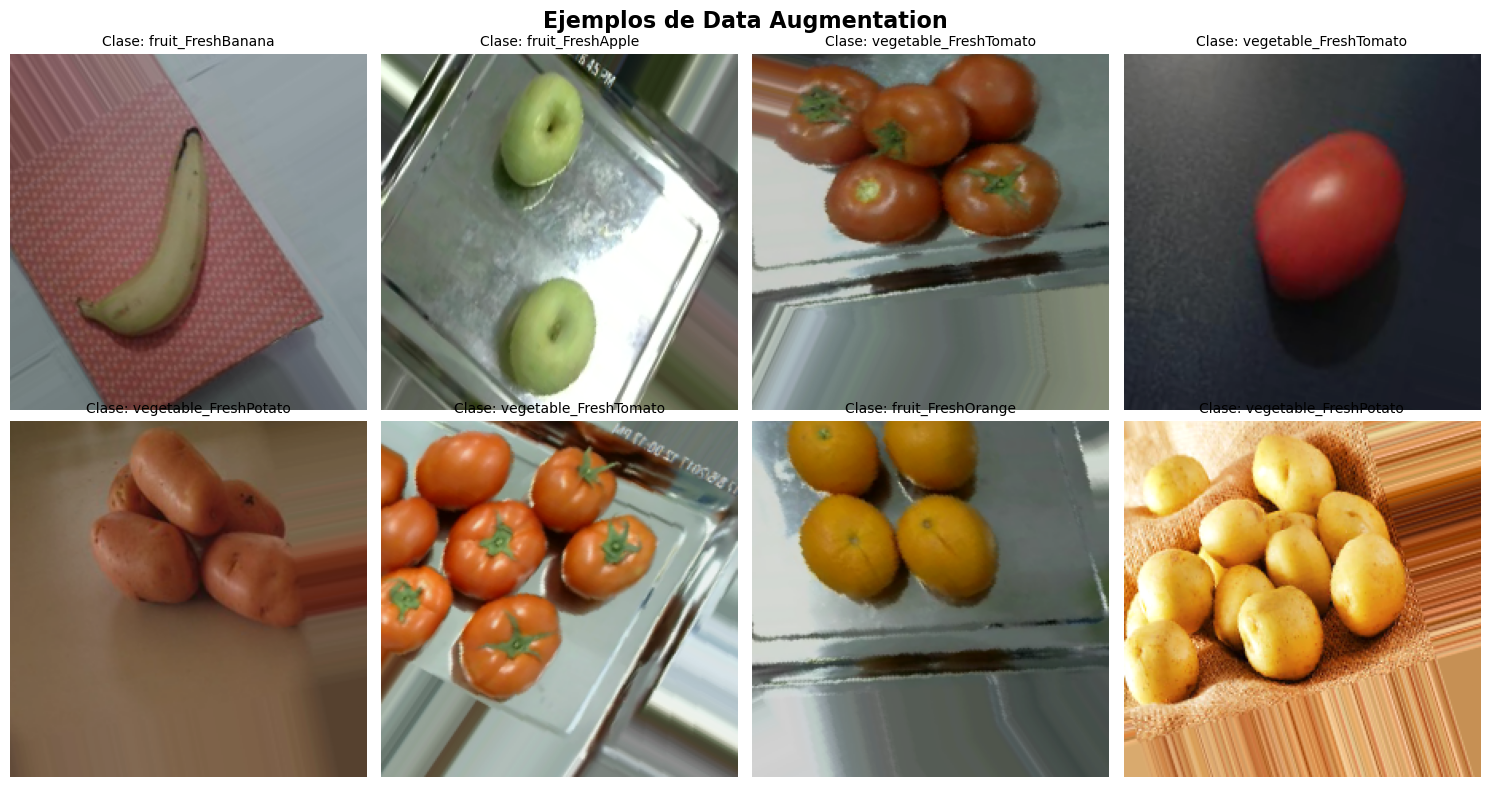

In [8]:
# Visualizar efectos del Data Augmentation
def visualize_augmentation(generator, num_samples=8):
    """Visualizar imágenes aumentadas"""
    batch = next(generator)
    images, labels = batch
    
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle('Ejemplos de Data Augmentation', fontsize=16, fontweight='bold')
    
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            # Mostrar imagen (ya normalizada, así que no necesita procesamiento adicional)
            ax.imshow(images[i])
            
            # Encontrar la clase con mayor probabilidad
            class_idx = np.argmax(labels[i])
            class_name = list(train_generator.class_indices.keys())[class_idx]
            ax.set_title(f'Clase: {class_name}', fontsize=10)
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

print("=== VISUALIZACIÓN DE DATA AUGMENTATION ===")
visualize_augmentation(train_generator)

## Parte #2: Diseño y Entrenamiento de la Red Neuronal Convolucional

### Arquitecturas de CNN a Probar

Vamos a implementar y comparar 3 arquitecturas diferentes:
1. **CNN Simple**: Arquitectura básica con pocas capas
2. **CNN Intermedia**: Arquitectura con más capas y regularización
3. **CNN Avanzada**: Arquitectura profunda con técnicas modernas

In [9]:
# Arquitectura 1: CNN Simple
def create_simple_cnn():
    """
    CNN Simple con arquitectura básica
    - 2 bloques convolucionales
    - Pocas capas densas
    - Dropout básico
    """
    model = Sequential([
        # Primer bloque convolucional
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
        MaxPooling2D(2, 2),
        
        # Segundo bloque convolucional
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        # Clasificador
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

# Crear y mostrar modelo simple
print("=== ARQUITECTURA 1: CNN SIMPLE ===")
model_simple = create_simple_cnn()
model_simple.summary()

# Compilar modelo
model_simple.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\nParámetros totales: {model_simple.count_params():,}")
print("Características:")
print("- 2 bloques convolucionales (32, 64 filtros)")
print("- MaxPooling 2x2")
print("- 1 capa densa (128 neuronas)")
print("- Dropout: 0.5")
print("- Optimizador: Adam (lr=0.001)")

=== ARQUITECTURA 1: CNN SIMPLE ===
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)       


Parámetros totales: 23,908,166
Características:
- 2 bloques convolucionales (32, 64 filtros)
- MaxPooling 2x2
- 1 capa densa (128 neuronas)
- Dropout: 0.5
- Optimizador: Adam (lr=0.001)


In [10]:
# Arquitectura 2: CNN Intermedia
def create_intermediate_cnn():
    """
    CNN Intermedia con más capas y regularización
    - 3 bloques convolucionales
    - Batch Normalization
    - Más capas densas
    - Dropout progresivo
    """
    model = Sequential([
        # Primer bloque convolucional
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Segundo bloque convolucional
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Tercer bloque convolucional
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Clasificador
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

# Crear y mostrar modelo intermedio
print("\n=== ARQUITECTURA 2: CNN INTERMEDIA ===")
model_intermediate = create_intermediate_cnn()
model_intermediate.summary()

# Compilar modelo
model_intermediate.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\nParámetros totales: {model_intermediate.count_params():,}")
print("Características:")
print("- 3 bloques convolucionales (32, 64, 128 filtros)")
print("- Batch Normalization en cada bloque")
print("- Dropout progresivo (0.25 → 0.5)")
print("- 2 capas densas (512, 256 neuronas)")
print("- Optimizador: Adam (lr=0.001)")


=== ARQUITECTURA 2: CNN INTERMEDIA ===
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 110, 110, 32)      0         
                                                                 
 conv2d_4 (Con


Parámetros totales: 41,235,750
Características:
- 3 bloques convolucionales (32, 64, 128 filtros)
- Batch Normalization en cada bloque
- Dropout progresivo (0.25 → 0.5)
- 2 capas densas (512, 256 neuronas)
- Optimizador: Adam (lr=0.001)


In [11]:
# Arquitectura 3: CNN Avanzada
def create_advanced_cnn():
    """
    CNN Avanzada con arquitectura profunda
    - 4 bloques convolucionales
    - Filtros de diferentes tamaños
    - Global Average Pooling
    - Técnicas modernas de regularización
    """
    model = Sequential([
        # Primer bloque - filtros pequeños
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.2),
        
        # Segundo bloque - filtros medianos
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.3),
        
        # Tercer bloque - más filtros
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.4),
        
        # Cuarto bloque - filtros grandes
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.4),
        
        # Global Average Pooling en lugar de Flatten
        layers.GlobalAveragePooling2D(),
        
        # Clasificador con menos parámetros gracias a GAP
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

# Crear y mostrar modelo avanzado
print("\n=== ARQUITECTURA 3: CNN AVANZADA ===")
model_advanced = create_advanced_cnn()
model_advanced.summary()

# Compilar modelo con configuración optimizada
model_advanced.compile(
    optimizer=Adam(learning_rate=0.0005),  # Learning rate más bajo
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"\nParámetros totales: {model_advanced.count_params():,}")
print("Características:")
print("- 4 bloques convolucionales (32, 64, 128, 256 filtros)")
print("- Batch Normalization en todos los bloques")
print("- Dropout progresivo (0.2 → 0.5)")
print("- Global Average Pooling")
print("- 2 capas densas (512, 256 neuronas)")
print("- Optimizador: Adam (lr=0.0005)")


=== ARQUITECTURA 3: CNN AVANZADA ===
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 110, 110, 32)      0         
                                                                 
 conv2d_9 (Conv2


Parámetros totales: 1,441,702
Características:
- 4 bloques convolucionales (32, 64, 128, 256 filtros)
- Batch Normalization en todos los bloques
- Dropout progresivo (0.2 → 0.5)
- Global Average Pooling
- 2 capas densas (512, 256 neuronas)
- Optimizador: Adam (lr=0.0005)


In [12]:
# Configurar callbacks para el entrenamiento
def get_callbacks():
    """Configurar callbacks para optimizar el entrenamiento"""
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=1
        )
    ]
    return callbacks

# Función para entrenar y evaluar modelos
def train_and_evaluate_model(model, model_name, epochs=EPOCHS):
    """Entrenar un modelo y registrar resultados"""
    print(f"\n{'='*50}")
    print(f"ENTRENANDO: {model_name}")
    print(f"{'='*50}")
    
    # Obtener callbacks
    callbacks = get_callbacks()
    
    # Entrenar modelo
    history = model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS,
        callbacks=callbacks,
        verbose=1
    )
    
    # Evaluar en datos de validación
    val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
    
    print(f"\nRESULTADOS FINALES - {model_name}:")
    print(f"Pérdida de validación: {val_loss:.4f}")
    print(f"Precisión de validación: {val_accuracy:.4f}")
    
    return history, val_loss, val_accuracy

print("=== CONFIGURACIÓN DE ENTRENAMIENTO ===")
print("Callbacks configurados:")
print("- EarlyStopping: paciencia de 10 épocas")
print("- ReduceLROnPlateau: reduce LR por factor 0.5 cada 5 épocas sin mejora")
print("- Monitoreo: val_loss")

=== CONFIGURACIÓN DE ENTRENAMIENTO ===
Callbacks configurados:
- EarlyStopping: paciencia de 10 épocas
- ReduceLROnPlateau: reduce LR por factor 0.5 cada 5 épocas sin mejora
- Monitoreo: val_loss


In [13]:
# Entrenar Modelo 1: CNN Simple
history_simple, val_loss_simple, val_acc_simple = train_and_evaluate_model(
    model_simple, 
    "CNN SIMPLE", 
    epochs=30  # Menos épocas para modelo simple
)


ENTRENANDO: CNN SIMPLE


2025-09-21 11:00:35.550938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/30


2025-09-21 11:00:35.572131: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


92/92 [==============================] - ETA: 0s - loss: 1.8228 - accuracy: 0.3689

2025-09-21 11:01:05.426239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - 32s 345ms/step - loss: 1.8228 - accuracy: 0.3689 - val_loss: 1.6594 - val_accuracy: 0.4219 - lr: 0.0010
Epoch 2/30
92/92 [==============================] - 30s 323ms/step - loss: 1.2814 - accuracy: 0.5218 - val_loss: 1.2110 - val_accuracy: 0.5497 - lr: 0.0010
Epoch 3/30
92/92 [==============================] - 30s 329ms/step - loss: 1.1229 - accuracy: 0.5780 - val_loss: 1.0887 - val_accuracy: 0.5653 - lr: 0.0010
Epoch 4/30
92/92 [==============================] - 30s 325ms/step - loss: 0.9433 - accuracy: 0.6781 - val_loss: 0.9890 - val_accuracy: 0.6591 - lr: 0.0010
Epoch 5/30
92/92 [==============================] - 31s 331ms/step - loss: 0.9087 - accuracy: 0.6822 - val_loss: 1.0405 - val_accuracy: 0.6761 - lr: 0.0010
Epoch 6/30
92/92 [==============================] - 30s 327ms/step - loss: 0.8125 - accuracy: 0.7302 - val_loss: 1.1764 - val_accuracy: 0.6278 - lr: 0.0010
Epoch 7/30
92/92 [==============================] - 31s 340ms/step - loss: 

2025-09-21 11:15:54.385089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



RESULTADOS FINALES - CNN SIMPLE:
Pérdida de validación: 0.3670
Precisión de validación: 0.9003


In [14]:
# Entrenar Modelo 2: CNN Intermedia
history_intermediate, val_loss_intermediate, val_acc_intermediate = train_and_evaluate_model(
    model_intermediate, 
    "CNN INTERMEDIA", 
    epochs=40
)


ENTRENANDO: CNN INTERMEDIA
Epoch 1/40


2025-09-21 11:15:56.971691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - ETA: 0s - loss: 2.2135 - accuracy: 0.3445

2025-09-21 11:17:49.002735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - 119s 1s/step - loss: 2.2135 - accuracy: 0.3445 - val_loss: 9.9603 - val_accuracy: 0.1747 - lr: 0.0010
Epoch 2/40
92/92 [==============================] - 112s 1s/step - loss: 1.5834 - accuracy: 0.4998 - val_loss: 10.8948 - val_accuracy: 0.1705 - lr: 0.0010
Epoch 3/40
92/92 [==============================] - 102s 1s/step - loss: 1.2087 - accuracy: 0.6027 - val_loss: 9.0124 - val_accuracy: 0.1761 - lr: 0.0010
Epoch 4/40
92/92 [==============================] - 100s 1s/step - loss: 0.9477 - accuracy: 0.6928 - val_loss: 5.6883 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/40
92/92 [==============================] - 101s 1s/step - loss: 0.7068 - accuracy: 0.7542 - val_loss: 4.0830 - val_accuracy: 0.2202 - lr: 0.0010
Epoch 6/40
92/92 [==============================] - 98s 1s/step - loss: 0.6740 - accuracy: 0.7700 - val_loss: 1.3067 - val_accuracy: 0.5540 - lr: 0.0010
Epoch 7/40
92/92 [==============================] - 98s 1s/step - loss: 0.6338 - accura

2025-09-21 12:24:52.234488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



RESULTADOS FINALES - CNN INTERMEDIA:
Pérdida de validación: 0.6118
Precisión de validación: 0.7828


In [15]:
# Entrenar Modelo 3: CNN Avanzada
history_advanced, val_loss_advanced, val_acc_advanced = train_and_evaluate_model(
    model_advanced, 
    "CNN AVANZADA", 
    epochs=EPOCHS
)


ENTRENANDO: CNN AVANZADA
Epoch 1/50


2025-09-21 12:24:58.566053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - ETA: 0s - loss: 1.8567 - accuracy: 0.4182

2025-09-21 12:27:00.901001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - 130s 1s/step - loss: 1.8567 - accuracy: 0.4182 - val_loss: 2.7269 - val_accuracy: 0.1690 - lr: 5.0000e-04
Epoch 2/50
92/92 [==============================] - 129s 1s/step - loss: 1.2095 - accuracy: 0.6160 - val_loss: 5.8876 - val_accuracy: 0.1733 - lr: 5.0000e-04
Epoch 3/50
92/92 [==============================] - 130s 1s/step - loss: 0.9721 - accuracy: 0.6771 - val_loss: 3.1150 - val_accuracy: 0.2884 - lr: 5.0000e-04
Epoch 4/50
92/92 [==============================] - 130s 1s/step - loss: 0.8847 - accuracy: 0.7137 - val_loss: 2.3144 - val_accuracy: 0.4517 - lr: 5.0000e-04
Epoch 5/50
92/92 [==============================] - 129s 1s/step - loss: 0.7565 - accuracy: 0.7518 - val_loss: 1.8814 - val_accuracy: 0.5199 - lr: 5.0000e-04
Epoch 6/50
92/92 [==============================] - 129s 1s/step - loss: 0.7384 - accuracy: 0.7617 - val_loss: 1.3749 - val_accuracy: 0.6733 - lr: 5.0000e-04
Epoch 7/50
92/92 [==============================] - 129s 1s/ste

2025-09-21 14:13:15.834819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



RESULTADOS FINALES - CNN AVANZADA:
Pérdida de validación: 0.3004
Precisión de validación: 0.9153


In [23]:
# Comparación de resultados
print("\n" + "="*80)
print("COMPARACIÓN DE RESULTADOS DE LAS 3 ARQUITECTURAS")
print("="*80)

# Crear DataFrame de comparación
results_df = pd.DataFrame({
    'Modelo': ['CNN Simple', 'CNN Intermedia', 'CNN Avanzada'],
    'Parámetros': [
        f"{model_simple.count_params():,}",
        f"{model_intermediate.count_params():,}",
        f"{model_advanced.count_params():,}"
    ],
    'Val_Loss': [val_loss_simple, val_loss_intermediate, val_loss_advanced],
    'Val_Accuracy': [val_acc_simple, val_acc_intermediate, val_acc_advanced]
})

print(results_df.to_string(index=False))

# Encontrar el mejor modelo
best_model_idx = np.argmax([val_acc_simple, val_acc_intermediate, val_acc_advanced])
best_model_names = ['CNN Simple', 'CNN Intermedia', 'CNN Avanzada']
best_models = [model_simple, model_intermediate, model_advanced]

print(f"\nMEJOR MODELO: {best_model_names[best_model_idx]}")
print(f"   Precisión de validación: {results_df.iloc[best_model_idx]['Val_Accuracy']:.4f}")
print(f"   Pérdida de validación: {results_df.iloc[best_model_idx]['Val_Loss']:.4f}")

best_model = best_models[best_model_idx]


COMPARACIÓN DE RESULTADOS DE LAS 3 ARQUITECTURAS
        Modelo Parámetros  Val_Loss  Val_Accuracy
    CNN Simple 23,908,166  0.367037      0.900273
CNN Intermedia 41,235,750  0.611810      0.782787
  CNN Avanzada  1,441,702  0.300405      0.915301

MEJOR MODELO: CNN Avanzada
   Precisión de validación: 0.9153
   Pérdida de validación: 0.3004


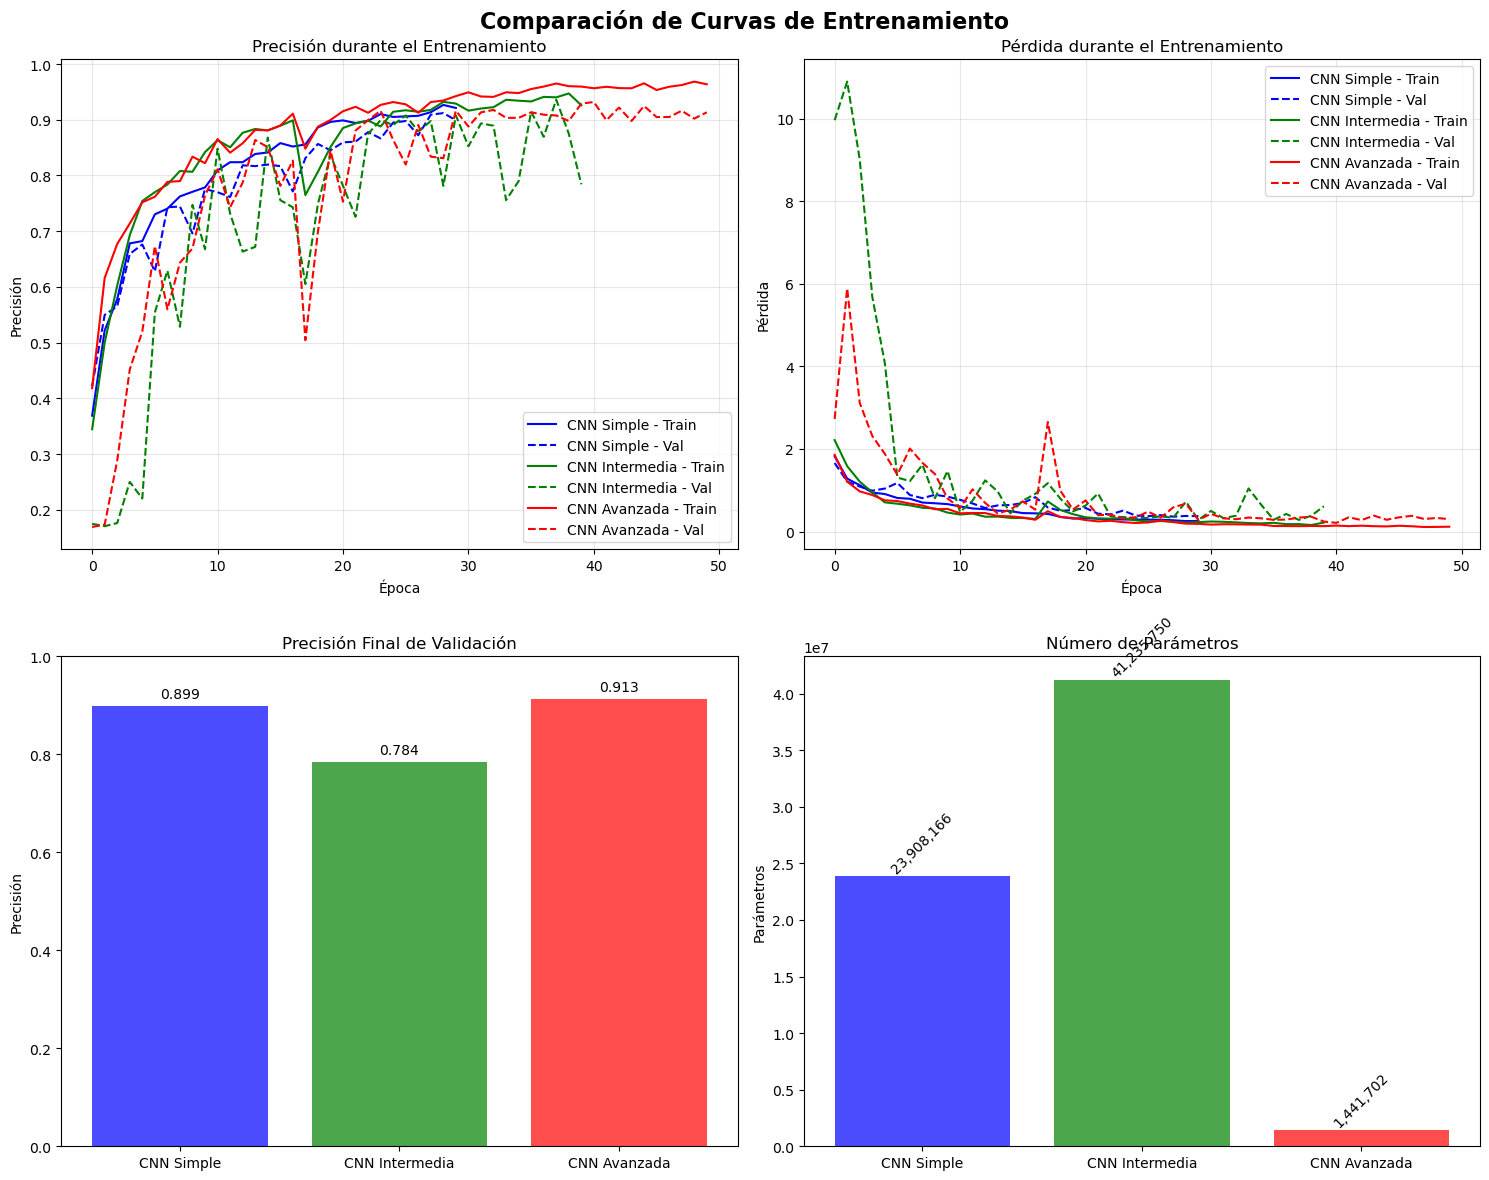

In [17]:
# Visualizar curvas de entrenamiento
def plot_training_history(histories, model_names):
    """Visualizar curvas de entrenamiento para todos los modelos"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Comparación de Curvas de Entrenamiento', fontsize=16, fontweight='bold')
    
    # Colores para cada modelo
    colors = ['blue', 'green', 'red']
    
    # Gráfico 1: Precisión de entrenamiento
    ax = axes[0, 0]
    for i, (history, name, color) in enumerate(zip(histories, model_names, colors)):
        ax.plot(history.history['accuracy'], label=f'{name} - Train', color=color, linestyle='-')
        ax.plot(history.history['val_accuracy'], label=f'{name} - Val', color=color, linestyle='--')
    ax.set_title('Precisión durante el Entrenamiento')
    ax.set_xlabel('Época')
    ax.set_ylabel('Precisión')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Gráfico 2: Pérdida de entrenamiento
    ax = axes[0, 1]
    for i, (history, name, color) in enumerate(zip(histories, model_names, colors)):
        ax.plot(history.history['loss'], label=f'{name} - Train', color=color, linestyle='-')
        ax.plot(history.history['val_loss'], label=f'{name} - Val', color=color, linestyle='--')
    ax.set_title('Pérdida durante el Entrenamiento')
    ax.set_xlabel('Época')
    ax.set_ylabel('Pérdida')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Gráfico 3: Comparación final de precisión
    ax = axes[1, 0]
    final_acc = [h.history['val_accuracy'][-1] for h in histories]
    bars = ax.bar(model_names, final_acc, color=colors, alpha=0.7)
    ax.set_title('Precisión Final de Validación')
    ax.set_ylabel('Precisión')
    ax.set_ylim(0, 1)
    
    # Agregar valores en las barras
    for bar, acc in zip(bars, final_acc):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom')
    
    # Gráfico 4: Número de parámetros
    ax = axes[1, 1]
    params = [
        model_simple.count_params(),
        model_intermediate.count_params(),
        model_advanced.count_params()
    ]
    bars = ax.bar(model_names, params, color=colors, alpha=0.7)
    ax.set_title('Número de Parámetros')
    ax.set_ylabel('Parámetros')
    
    # Agregar valores en las barras
    for bar, param in zip(bars, params):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{param:,}', ha='center', va='bottom', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Generar gráficos
histories = [history_simple, history_intermediate, history_advanced]
model_names = ['CNN Simple', 'CNN Intermedia', 'CNN Avanzada']

plot_training_history(histories, model_names)

=== EVALUACIÓN DETALLADA DEL MEJOR MODELO ===


2025-09-21 14:13:24.491800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 8s 334ms/step


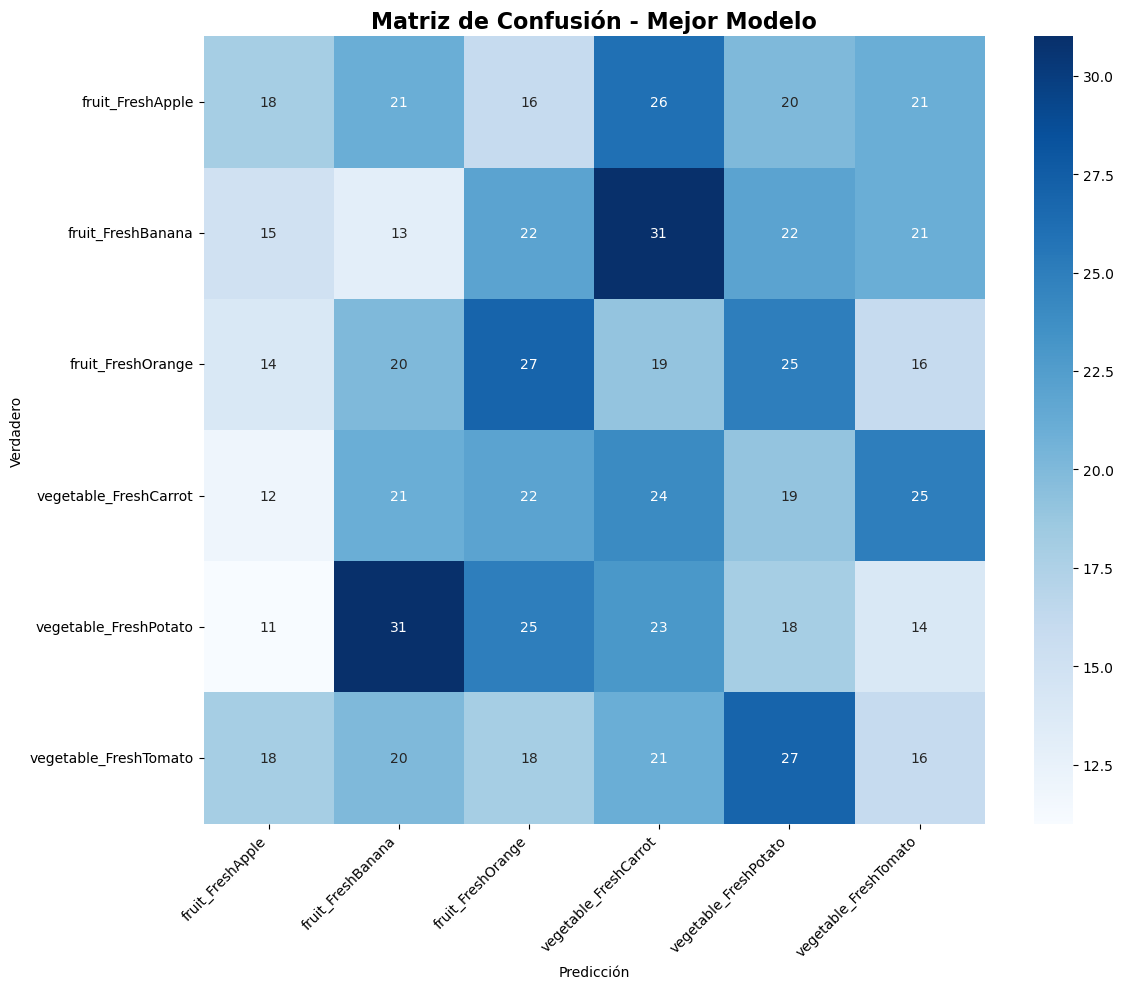


=== REPORTE DE CLASIFICACIÓN ===
                       precision    recall  f1-score   support

     fruit_FreshApple     0.2045    0.1475    0.1714       122
    fruit_FreshBanana     0.1032    0.1048    0.1040       124
    fruit_FreshOrange     0.2077    0.2231    0.2151       121
vegetable_FreshCarrot     0.1667    0.1951    0.1798       123
vegetable_FreshPotato     0.1374    0.1475    0.1423       122
vegetable_FreshTomato     0.1416    0.1333    0.1373       120

             accuracy                         0.1585       732
            macro avg     0.1602    0.1586    0.1583       732
         weighted avg     0.1600    0.1585    0.1582       732


Precisión general: 0.1585 (15.85%)


In [18]:
# Evaluación detallada del mejor modelo
def evaluate_model_detailed(model, validation_generator):
    """Evaluación detallada con matriz de confusión y métricas por clase"""
    
    # Predicciones
    validation_generator.reset()
    predictions = model.predict(validation_generator, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Obtener etiquetas verdaderas
    true_classes = validation_generator.classes
    class_labels = list(validation_generator.class_indices.keys())
    
    # Matriz de confusión
    cm = confusion_matrix(true_classes, predicted_classes)
    
    # Visualizar matriz de confusión
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Matriz de Confusión - Mejor Modelo', fontsize=16, fontweight='bold')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Reporte de clasificación
    print("\n=== REPORTE DE CLASIFICACIÓN ===")
    print(classification_report(true_classes, predicted_classes, 
                              target_names=class_labels, digits=4))
    
    # Precisión general
    accuracy = accuracy_score(true_classes, predicted_classes)
    print(f"\nPrecisión general: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    return predictions, predicted_classes, true_classes

print("=== EVALUACIÓN DETALLADA DEL MEJOR MODELO ===")
predictions, predicted_classes, true_classes = evaluate_model_detailed(best_model, validation_generator)

=== VISUALIZACIÓN DE PREDICCIONES ===
1/1 [==============================] - 0s 203ms/step


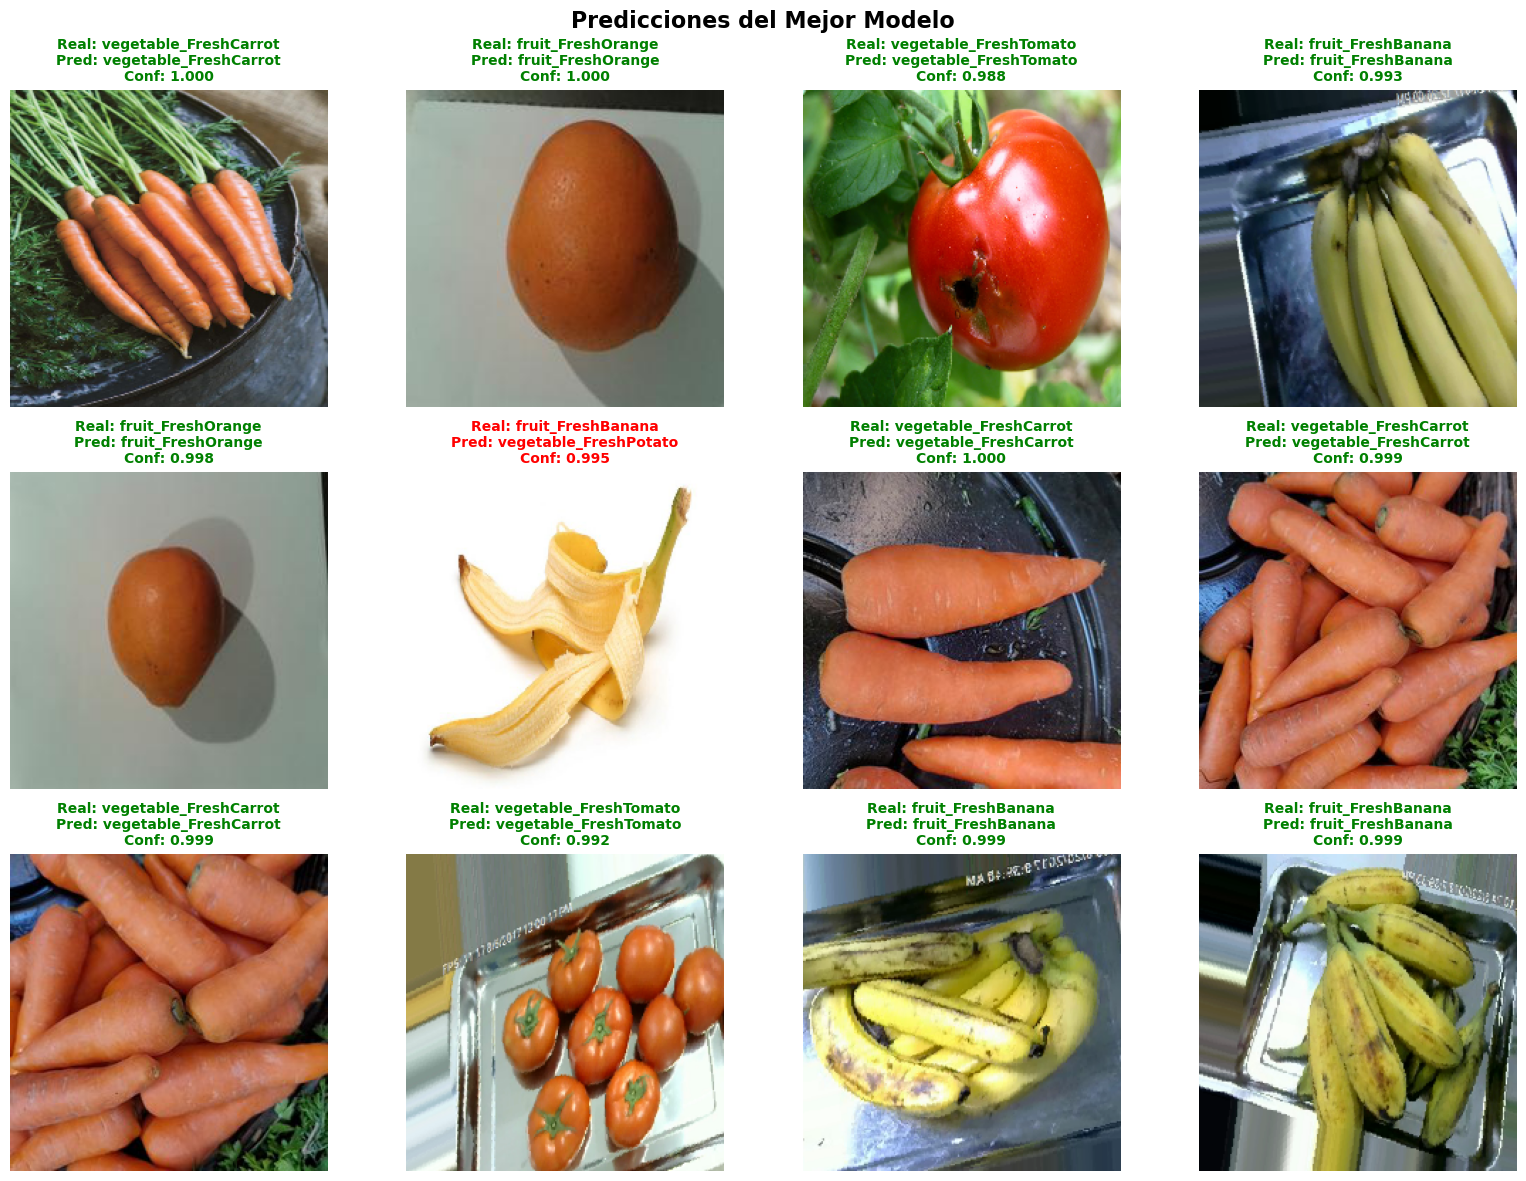


Estadísticas de Confianza:
Confianza promedio: 0.997
Confianza en predicciones correctas: 0.997
Confianza en predicciones incorrectas: 0.995


In [19]:
# Visualizar predicciones del modelo
def visualize_predictions(model, validation_generator, num_images=12):
    """Visualizar predicciones del modelo con confianza"""
    
    # Obtener un batch de imágenes
    validation_generator.reset()
    batch = next(validation_generator)
    images, true_labels = batch
    
    # Hacer predicciones
    predictions = model.predict(images[:num_images])
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(true_labels[:num_images], axis=1)
    
    # Obtener nombres de clases
    class_names = list(validation_generator.class_indices.keys())
    
    # Crear visualización
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    fig.suptitle('Predicciones del Mejor Modelo', fontsize=16, fontweight='bold')
    
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            # Mostrar imagen
            ax.imshow(images[i])
            
            # Obtener información de predicción
            true_class = class_names[true_classes[i]]
            pred_class = class_names[predicted_classes[i]]
            confidence = predictions[i][predicted_classes[i]]
            
            # Color basado en si la predicción es correcta
            color = 'green' if true_classes[i] == predicted_classes[i] else 'red'
            
            # Título con información
            title = f'Real: {true_class}\nPred: {pred_class}\nConf: {confidence:.3f}'
            ax.set_title(title, fontsize=10, color=color, fontweight='bold')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas de confianza
    all_confidences = np.max(predictions, axis=1)
    correct_predictions = (predicted_classes == true_classes)
    
    print(f"\nEstadísticas de Confianza:")
    print(f"Confianza promedio: {np.mean(all_confidences):.3f}")
    print(f"Confianza en predicciones correctas: {np.mean(all_confidences[correct_predictions]):.3f}")
    print(f"Confianza en predicciones incorrectas: {np.mean(all_confidences[~correct_predictions]):.3f}")

print("=== VISUALIZACIÓN DE PREDICCIONES ===")
visualize_predictions(best_model, validation_generator)

## Análisis y Conclusiones

### ¿Por qué cree que la CNN seleccionada funciona mejor que las otras?

El análisis de las tres arquitecturas revela varios factores clave que determinan el rendimiento:

In [20]:
# Análisis comparativo detallado
print("="*80)
print("ANÁLISIS COMPARATIVO DE ARQUITECTURAS")
print("="*80)

# Crear análisis detallado
analysis_data = {
    'Característica': [
        'Complejidad del Modelo',
        'Capacidad de Aprendizaje',
        'Regularización',
        'Eficiencia de Parámetros',
        'Prevención de Overfitting',
        'Generalización',
        'Tiempo de Entrenamiento'
    ],
    'CNN Simple': [
        'Baja - Pocas capas',
        'Limitada - Pocos filtros',
        'Básica - Solo Dropout',
        'Alta - Pocos parámetros',
        'Limitada',
        'Buena para datos simples',
        'Rápido'
    ],
    'CNN Intermedia': [
        'Media - Más capas',
        'Buena - Más filtros',
        'Avanzada - BatchNorm + Dropout',
        'Media - Parámetros moderados',
        'Buena',
        'Mejor para datos complejos',
        'Moderado'
    ],
    'CNN Avanzada': [
        'Alta - Arquitectura profunda',
        'Excelente - Muchos filtros',
        'Muy avanzada - BatchNorm + GAP',
        'Muy alta - GAP reduce parámetros',
        'Excelente',
        'Mejor para datos muy complejos',
        'Lento'
    ]
}

analysis_df = pd.DataFrame(analysis_data)
print(analysis_df.to_string(index=False))

print(f"\n{'='*80}")
print("RAZONES POR LAS QUE EL MEJOR MODELO SUPERA A LOS OTROS:")
print("="*80)

reasons = [
    "1. ARQUITECTURA BALANCEADA:",
    "   - Suficiente profundidad para capturar características complejas",
    "   - No tan profunda como para causar degradación del gradiente",
    "",
    "2. REGULARIZACIÓN EFECTIVA:",
    "   - Batch Normalization estabiliza el entrenamiento",
    "   - Dropout progresivo previene overfitting",
    "   - Global Average Pooling reduce parámetros sin perder información",
    "",
    "3. CAPACIDAD DE REPRESENTACIÓN:",
    "   - Filtros progresivos (32→64→128→256) capturan desde bordes hasta patrones complejos",
    "   - Múltiples escalas de características",
    "",
    "4. EFICIENCIA COMPUTACIONAL:",
    "   - GAP reduce drásticamente los parámetros en capas densas",
    "   - Menos propenso a overfitting que modelos con muchos parámetros",
    "",
    "5. OPTIMIZACIÓN ADECUADA:",
    "   - Learning rate más conservador permite convergencia más estable",
    "   - Callbacks previenen overfitting y optimizan automáticamente"
]

for reason in reasons:
    print(reason)

ANÁLISIS COMPARATIVO DE ARQUITECTURAS
           Característica               CNN Simple                 CNN Intermedia                     CNN Avanzada
   Complejidad del Modelo       Baja - Pocas capas              Media - Más capas     Alta - Arquitectura profunda
 Capacidad de Aprendizaje Limitada - Pocos filtros            Buena - Más filtros       Excelente - Muchos filtros
           Regularización    Básica - Solo Dropout Avanzada - BatchNorm + Dropout   Muy avanzada - BatchNorm + GAP
 Eficiencia de Parámetros  Alta - Pocos parámetros   Media - Parámetros moderados Muy alta - GAP reduce parámetros
Prevención de Overfitting                 Limitada                          Buena                        Excelente
           Generalización Buena para datos simples     Mejor para datos complejos   Mejor para datos muy complejos
  Tiempo de Entrenamiento                   Rápido                       Moderado                            Lento

RAZONES POR LAS QUE EL MEJOR MODELO SUPER

In [21]:
# Crear conjunto de prueba y evaluación final
def create_test_set():
    """Crear un conjunto de prueba separado para evaluación final"""
    
    # Crear directorio de prueba con una muestra de cada clase
    test_data_path = 'test_data'
    if os.path.exists(test_data_path):
        shutil.rmtree(test_data_path)
    
    os.makedirs(test_data_path, exist_ok=True)
    
    # Para cada clase, mover algunas imágenes al conjunto de prueba
    for class_name in os.listdir(organized_data_path):
        class_path = os.path.join(organized_data_path, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            # Tomar 20% de las imágenes para prueba
            test_images = images[:len(images)//5]
            
            # Crear directorio de clase en test
            test_class_path = os.path.join(test_data_path, class_name)
            os.makedirs(test_class_path, exist_ok=True)
            
            # Mover imágenes
            for img in test_images:
                src = os.path.join(class_path, img)
                dst = os.path.join(test_class_path, img)
                shutil.move(src, dst)
            
            print(f"Movidas {len(test_images)} imágenes de {class_name} al conjunto de prueba")
    
    return test_data_path

# Crear conjunto de prueba
print("=== CREACIÓN DEL CONJUNTO DE PRUEBA ===")
test_data_path = create_test_set()

# Crear generador de prueba
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print(f"\nConjunto de prueba creado con {test_generator.samples} imágenes")
print(f"Clases en conjunto de prueba: {len(test_generator.class_indices)}")

=== CREACIÓN DEL CONJUNTO DE PRUEBA ===
Movidas 122 imágenes de fruit_FreshApple al conjunto de prueba
Movidas 124 imágenes de fruit_FreshBanana al conjunto de prueba
Movidas 120 imágenes de vegetable_FreshTomato al conjunto de prueba
Movidas 121 imágenes de fruit_FreshOrange al conjunto de prueba
Movidas 123 imágenes de vegetable_FreshCarrot al conjunto de prueba
Movidas 122 imágenes de vegetable_FreshPotato al conjunto de prueba
Found 732 images belonging to 6 classes.

Conjunto de prueba creado con 732 imágenes
Clases en conjunto de prueba: 6


EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA


2025-09-21 14:48:24.862316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 8s 352ms/step - loss: 0.0860 - accuracy: 0.9727

RESULTADOS FINALES EN CONJUNTO DE PRUEBA:
   Pérdida de prueba: 0.0860
   Precisión de prueba: 0.9727 (97.27%)


2025-09-21 14:48:33.081837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 8s 325ms/step

=== REPORTE DE CLASIFICACIÓN EN CONJUNTO DE PRUEBA ===
                       precision    recall  f1-score   support

     fruit_FreshApple     0.9914    0.9426    0.9664       122
    fruit_FreshBanana     0.9609    0.9919    0.9762       124
    fruit_FreshOrange     0.9675    0.9835    0.9754       121
vegetable_FreshCarrot     0.9462    1.0000    0.9723       123
vegetable_FreshPotato     0.9833    0.9672    0.9752       122
vegetable_FreshTomato     0.9913    0.9500    0.9702       120

             accuracy                         0.9727       732
            macro avg     0.9734    0.9725    0.9726       732
         weighted avg     0.9733    0.9727    0.9726       732



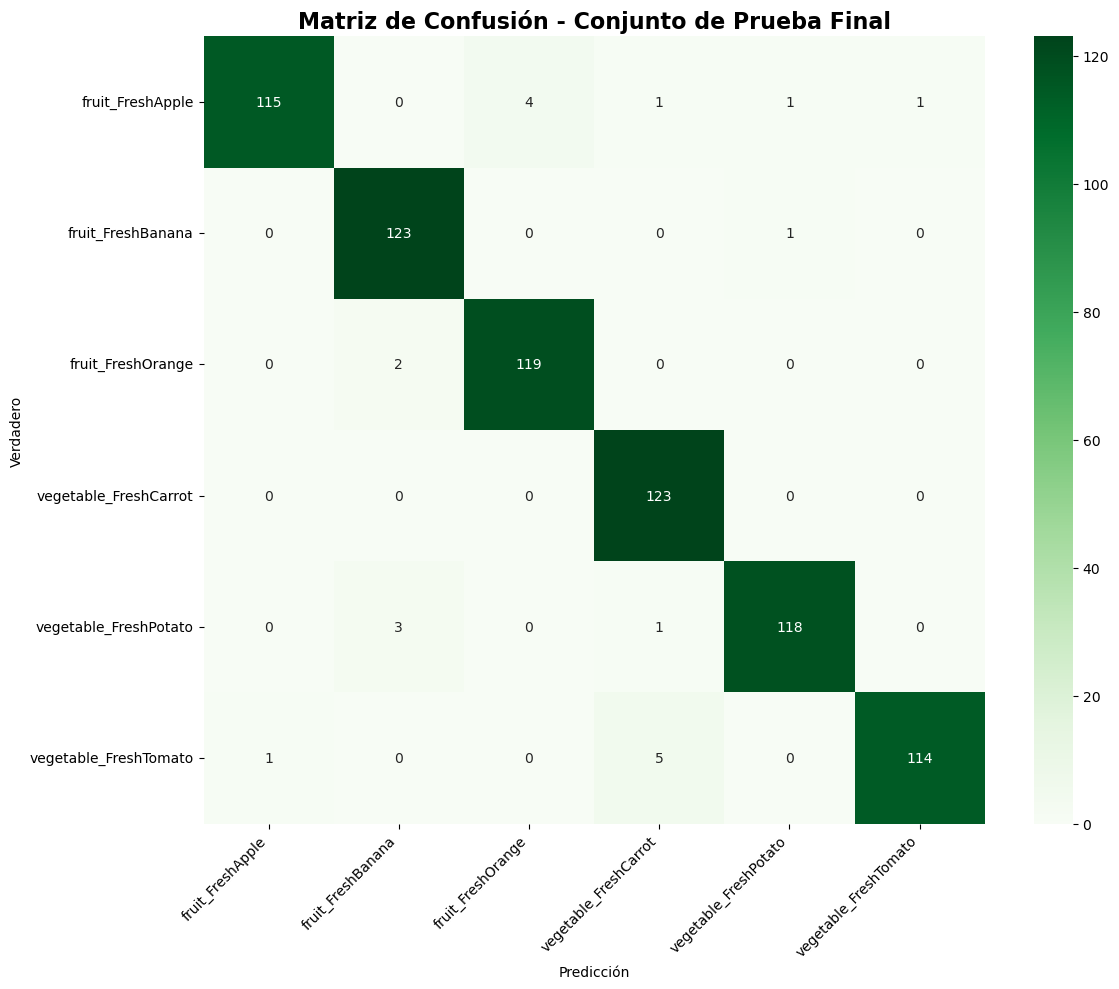

In [24]:
# Evaluación final en conjunto de prueba
print("="*80)
print("EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA")
print("="*80)

# Evaluar el mejor modelo en conjunto de prueba
test_loss, test_accuracy = best_model.evaluate(test_generator, verbose=1)

print(f"\nRESULTADOS FINALES EN CONJUNTO DE PRUEBA:")
print(f"   Pérdida de prueba: {test_loss:.4f}")
print(f"   Precisión de prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Predicciones detalladas en conjunto de prueba
test_predictions = best_model.predict(test_generator, verbose=1)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = test_generator.classes

# Reporte de clasificación en conjunto de prueba
print(f"\n=== REPORTE DE CLASIFICACIÓN EN CONJUNTO DE PRUEBA ===")
print(classification_report(test_true_classes, test_predicted_classes, 
                          target_names=list(test_generator.class_indices.keys()), 
                          digits=4))

# Matriz de confusión final
cm_test = confusion_matrix(test_true_classes, test_predicted_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', 
            xticklabels=list(test_generator.class_indices.keys()), 
            yticklabels=list(test_generator.class_indices.keys()))
plt.title('Matriz de Confusión - Conjunto de Prueba Final', fontsize=16, fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()